# Project: Investigate a Dataset - TMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
The dataset contains 21 column such as cast, movie name, revenu, budget and overview


### Question(s) for Analysis:

<p>What is the Average runtime of the movies list?</p>
<p>Which genres are most popular from year to year?</p>
<p>What is the most popular actors?</p>
<p>What is the name of the top 10 Popular movies?</p>

In [23]:
import numpy as np
import pandas as pd
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
      Successfully uninstalled pandas-1.2.4
    Running setup.py install for pandas: started
    Running setup.py install for pandas: still running...
    Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\eslam\anaconda3\lib\site-packages\pandas-1.2.4.dist-info\
   from C:\Users\eslam\anaconda3\Lib\site-packages\~andas-1.2.4.dist-info
  Moving to c:\users\eslam\anaconda3\lib\site-packages\pandas\
   from C:\Users\eslam\anaconda3\Lib\site-packages\~andas


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\eslam\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\eslam\\AppData\\Local\\Temp\\pip-install-ev5n0v2g\\pandas_1eef9cf0ad6f4808b5c223284ccd1498\\setup.py'"'"'; __file__='"'"'C:\\Users\\eslam\\AppData\\Local\\Temp\\pip-install-ev5n0v2g\\pandas_1eef9cf0ad6f4808b5c223284ccd1498\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\eslam\AppData\Local\Temp\pip-wheel-wmprtv_x'
       cwd: C:\Users\eslam\AppData\Local\Temp\pip-install-ev5n0v2g\pandas_1eef9cf0ad6f4808b5c223284ccd1498\
  Complete output (907 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-3.8\pandas
  copyin

  copying pandas\tests\groupby\aggregate\test_cython.py -> build\lib.win-amd64-3.8\pandas\tests\groupby\aggregate
  copying pandas\tests\groupby\aggregate\test_other.py -> build\lib.win-amd64-3.8\pandas\tests\groupby\aggregate
  copying pandas\tests\groupby\aggregate\__init__.py -> build\lib.win-amd64-3.8\pandas\tests\groupby\aggregate
  creating build\lib.win-amd64-3.8\pandas\tests\indexes\datetimes
  copying pandas\tests\indexes\datetimes\test_arithmetic.py -> build\lib.win-amd64-3.8\pandas\tests\indexes\datetimes
  copying pandas\tests\indexes\datetimes\test_astype.py -> build\lib.win-amd64-3.8\pandas\tests\indexes\datetimes
  copying pandas\tests\indexes\datetimes\test_construction.py -> build\lib.win-amd64-3.8\pandas\tests\indexes\datetimes
  copying pandas\tests\indexes\datetimes\test_datetime.py -> build\lib.win-amd64-3.8\pandas\tests\indexes\datetimes
  copying pandas\tests\indexes\datetimes\test_datetimelike.py -> build\lib.win-amd64-3.8\pandas\tests\indexes\datetimes
  copyin

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.shape

(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [7]:
df.drop(['id', 'imdb_id', 'tagline', 'keywords', 'homepage'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   overview              10862 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

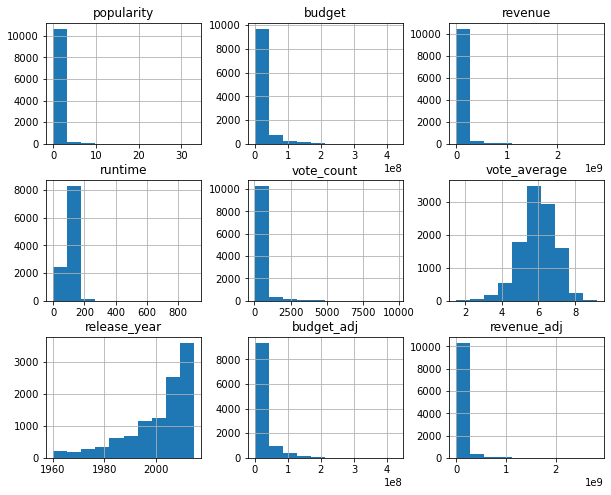

In [9]:
df.hist(figsize=(10,8))

### Clean NA Values

<p>Process of finding and replacing the NAN values</p>

In [10]:
df[df.production_companies.isnull()]

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,An unlikely team of activists and innovators h...,90,Adventure|Documentary,NaN,1/24/15,36,7.8,2015,0.0,0.0
259,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,After getting fired from her job as a maid at ...,84,TV Movie,NaN,11/27/15,10,7.6,2015,0.0,0.0
295,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,"When Anna Parisi, an unemployed fine arts pain...",84,Family|TV Movie,NaN,11/26/15,12,6.3,2015,0.0,0.0
298,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,Images coming from the crimes committed by a d...,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015,0.0,0.0
328,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,Jennifer Phang,In a near-future city where soaring opulence o...,92,Science Fiction|Drama|Family,NaN,6/23/15,29,6.4,2015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,0.149259,0,0,Interiors,Diane Keaton|Kristin Griffith|Mary Beth Hurt|R...,Woody Allen,Homage to Ingmar Bergman in this family drama ...,93,Drama,NaN,8/2/78,35,6.3,1978,0.0,0.0
10806,0.138635,0,0,Gates of Heaven,Lucille Billingsley|Zella Graham|Cal Harberts|...,Errol Morris,"The men who run a pet cemetery, and the men an...",85,Documentary,NaN,10/1/78,12,5.9,1978,0.0,0.0
10816,0.064602,0,0,The Rutles: All You Need Is Cash,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,Eric Idle|Gary Weis,The story of the rise and fall of the Pre-Fab ...,76,Comedy,NaN,3/22/78,14,6.0,1978,0.0,0.0
10842,0.253437,0,0,Winnie the Pooh and the Honey Tree,Sterling Holloway|Junius Matthews|Sebastian Ca...,Wolfgang Reitherman,Christopher Robin's bear attempts to raid a be...,25,Animation|Family,NaN,1/1/66,12,7.9,1966,0.0,0.0


In [11]:
df.production_companies.fillna('None', inplace=True)

In [14]:
df[df.production_companies == 'None']

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,An unlikely team of activists and innovators h...,90,Adventure|Documentary,None,1/24/15,36,7.8,2015,0.0,0.0
259,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,After getting fired from her job as a maid at ...,84,TV Movie,None,11/27/15,10,7.6,2015,0.0,0.0
295,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,"When Anna Parisi, an unemployed fine arts pain...",84,Family|TV Movie,None,11/26/15,12,6.3,2015,0.0,0.0
298,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,Images coming from the crimes committed by a d...,95,Crime|Horror|Thriller,None,9/14/15,10,4.7,2015,0.0,0.0
328,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,Jennifer Phang,In a near-future city where soaring opulence o...,92,Science Fiction|Drama|Family,None,6/23/15,29,6.4,2015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,0.149259,0,0,Interiors,Diane Keaton|Kristin Griffith|Mary Beth Hurt|R...,Woody Allen,Homage to Ingmar Bergman in this family drama ...,93,Drama,None,8/2/78,35,6.3,1978,0.0,0.0
10806,0.138635,0,0,Gates of Heaven,Lucille Billingsley|Zella Graham|Cal Harberts|...,Errol Morris,"The men who run a pet cemetery, and the men an...",85,Documentary,None,10/1/78,12,5.9,1978,0.0,0.0
10816,0.064602,0,0,The Rutles: All You Need Is Cash,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,Eric Idle|Gary Weis,The story of the rise and fall of the Pre-Fab ...,76,Comedy,None,3/22/78,14,6.0,1978,0.0,0.0
10842,0.253437,0,0,Winnie the Pooh and the Honey Tree,Sterling Holloway|Junius Matthews|Sebastian Ca...,Wolfgang Reitherman,Christopher Robin's bear attempts to raid a be...,25,Animation|Family,None,1/1/66,12,7.9,1966,0.0,0.0


In [15]:
df[df.genres.isnull()]

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,None,10/29/15,21,6.1,2015,0.00000,0.0
620,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,None,10/3/14,13,6.8,2014,0.00000,0.0
1712,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,None,2/27/09,11,7.0,2009,0.00000,0.0
2370,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,NaN,0,NaN,None,6/5/10,12,5.8,2010,0.00000,0.0
2376,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,None,12/25/10,11,7.7,2010,0.00000,0.0
2853,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,The story takes place in a small town (called ...,110,NaN,None,2/2/01,12,7.2,2001,0.00000,0.0
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,None,8/13/08,11,6.1,2008,0.00000,0.0
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


In [18]:
df.genres.fillna('None', inplace = True)

In [19]:
df[df.genres.isnull()]

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   overview              10862 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10866 non-null  object 
 9   production_companies  10866 non-null  object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

In [21]:
df.fillna('None', inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10866 non-null  object 
 5   director              10866 non-null  object 
 6   overview              10866 non-null  object 
 7   runtime               10866 non-null  int64  
 8   genres                10866 non-null  object 
 9   production_companies  10866 non-null  object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

### Removing duplicates in rows if any

<p> Finding Duplicates and romoving them </>

In [28]:
# Seeing The current number of rows and columns
rows, col = df.shape
# Number of rows -1 because it contains header
print('There are {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are 10865 total entries of movies and 16 no.of columns in it.


In [29]:
df.drop_duplicates(keep ='first', inplace=True)
rows, col = df.shape

print('There are now {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are now 10864 total entries of movies and 16 no.of columns in it.


### Remove 0 From Budget & Revenu

In [30]:
col_list=['budget', 'revenue']

df[col_list] = df[col_list].replace(0, np.NAN)
df.dropna(subset = col_list, inplace = True)

rows, col = df.shape
print('After removing Zero from budget and revenu, We have only {} no. of movies.'.format(rows-1))

After removing Zero from budget and revenu, We have only 3853 no. of movies.


### Change Format of Budget & Revenu

In [34]:
df[col_list]=df[col_list].applymap(np.int64)
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

### Replace Zero values with NA in runtime column

In [33]:
df['runtime'] =df['runtime'].replace(0, np.NAN)

### Change Date Formatting

In [31]:
df.release_date = pd.to_datetime(df['release_date'])

In [32]:
df.head()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

<p>Starting the analysis</p>

### Research Question 1 (What is the Average runtime of the movies list)

In [35]:
# avg method
def avg_fun(column_name):
    return df[column_name].mean()

avg_fun('runtime')

109.22029060716139

In [40]:
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

<Figure size 900x500 with 0 Axes>

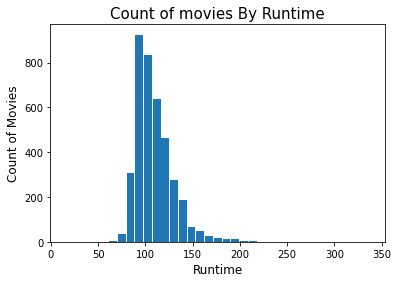

<Figure size 900x500 with 0 Axes>

In [43]:
# Plot Options
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
plt.title('Count of movies By Runtime', fontsize=15)
plt.xlabel('Runtime', fontsize = 12)
plt.ylabel('Count of Movies', fontsize=12)
plt.figure(figsize=(9,5), dpi = 100)

### Research Question 2  (Which genres are most popular?)

In [48]:
df['genres'].describe()


count      3854
unique     1053
top       Drama
freq        245
Name: genres, dtype: object

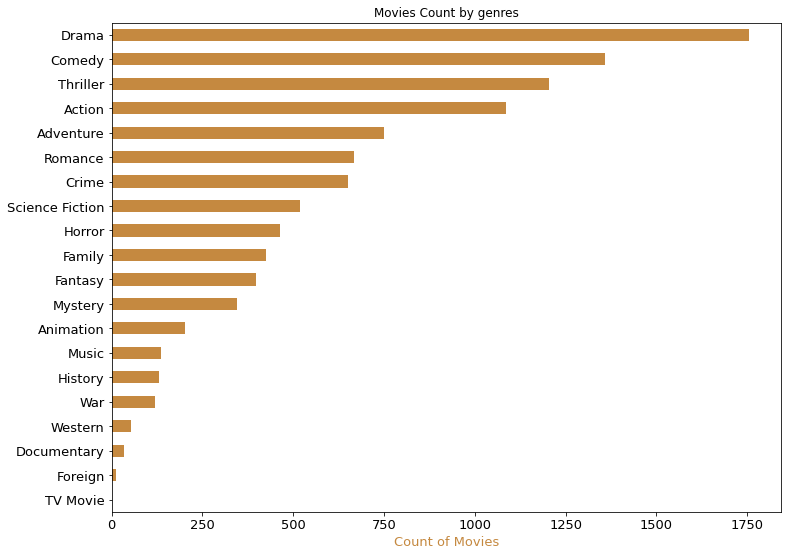

In [65]:
data = df['genres'].str.cat(sep = '|')
data = pd.Series(data.split('|'))
count = data.value_counts(ascending = False)

# Plot Code
count.sort_values(ascending = True, inplace = True)
lt = count.plot.barh(color = '#C58940', fontsize = 13)
lt.set(title = 'Movies Count by genres')
lt.set_xlabel('Count of Movies', color = '#C58940', fontsize = '13')
lt.figure.set_size_inches(12, 9)

In [66]:
df['cast'].describe()

count                                                  3854
unique                                                 3830
top       William Shatner|Leonard Nimoy|DeForest Kelley|...
freq                                                      5
Name: cast, dtype: object

In [81]:
data = df['cast'].str.cat(sep = '|')
data = pd.Series(data.split('|'))
count = data.value_counts(ascending = False)
count.head(10)

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
Johnny Depp          35
Morgan Freeman       34
Tom Hanks            34
Brad Pitt            34
Harrison Ford        34
dtype: int64

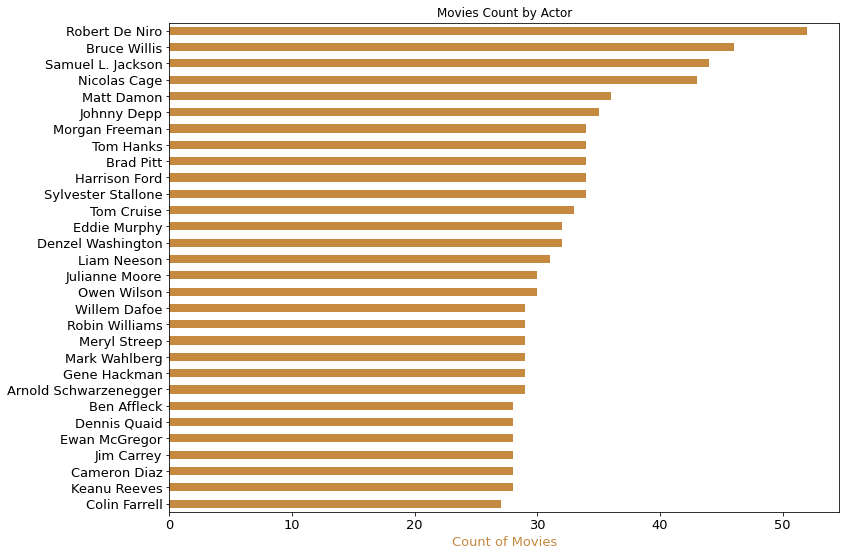

In [82]:
data_set = count.head(30)

# Plot Code
data_set.sort_values(ascending = True, inplace = True)
lt = data_set.plot.barh(color = '#C58940', fontsize = 13)
lt.set(title = 'Movies Count by Actor')
lt.set_xlabel('Count of Movies', color = '#C58940', fontsize = '13')
lt.figure.set_size_inches(12, 9)

###### Insert New Column to calculate the profit

In [84]:
df.insert(3,'profit',df['revenue']-df['budget'])
df.head()

,popularity,budget,revenue,profit,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


### Research Question 3  (Profitability VS Year of release)

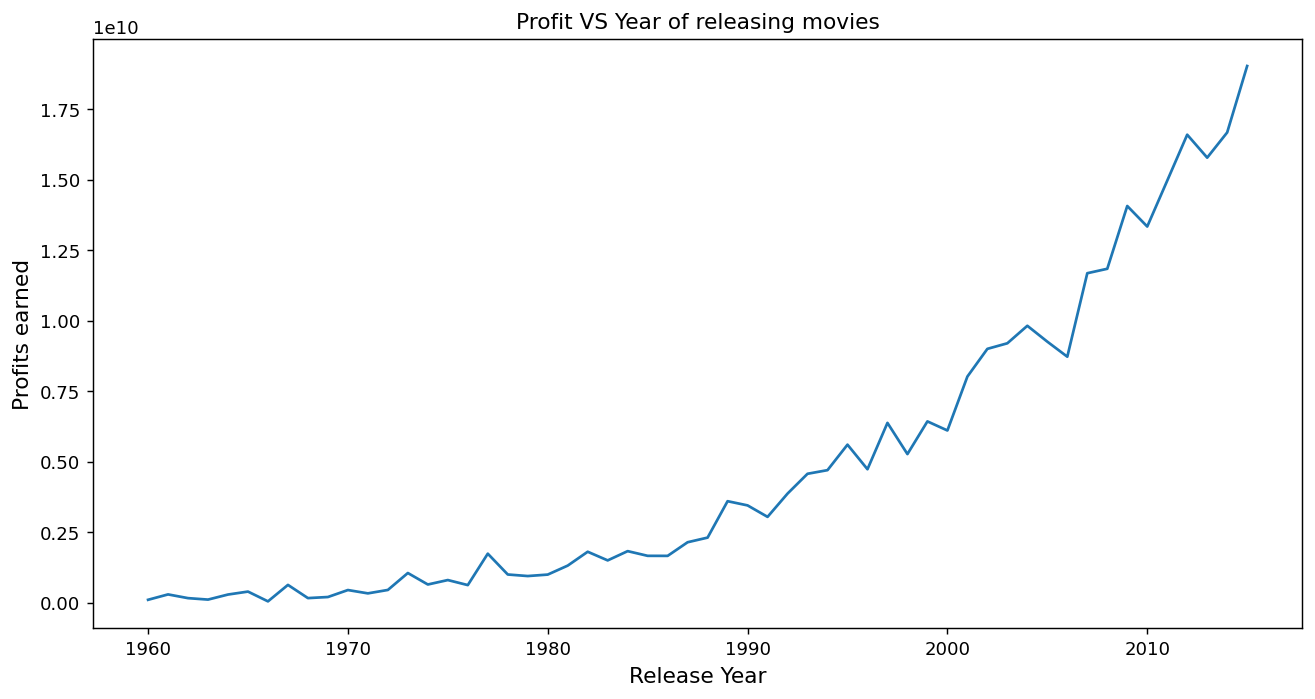

In [90]:
profits_year = df.groupby('release_year')['profit'].sum()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('Profits earned', fontsize = 12)
plt.title('Profit VS Year of releasing movies')
plt.plot(profits_year)

### Research Question 4  (What is the name of the top 10 popular movies?)

In [141]:
q4_data = df[['popularity', 'original_title']]

q4_data.sort_values(by='popularity', ascending=False, inplace=True)
q4_data.head(10)

<ipython-input-141-ac7b3ba3c44e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4_data.sort_values(by='popularity', ascending=False, inplace=True)


,popularity,original_title
0,32.985763,Jurassic World
1,28.419936,Mad Max: Fury Road
629,24.949134,Interstellar
630,14.311205,Guardians of the Galaxy
2,13.112507,Insurgent
631,12.971027,Captain America: The Winter Soldier
1329,12.037933,Star Wars
632,11.422751,John Wick
3,11.173104,Star Wars: The Force Awakens
633,10.739009,The Hunger Games: Mockingjay - Part 1


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [140]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1